Storytelling Project Specifications

Scenario:
You’re working as a Data Scientist at a Telecommunications company and the VP of Operations comes to you and says, “We need to reduce customer attrition! Our customers are leaving us for competitors at way too high a rate. Our VP of Sales says removing the month-to-month plan is NOT an option. I already know those customers leave the most, so I want you to focus on only the customers on the Month-to-Month plan. What do you think is driving them to churn? What can we do to try to keep these customers from leaving?”

Business Goal:
Reduce customer attrition, a.k.a. Churn, among the customers on the month-to-month plan. Why? Because keeping customers is cheaper than getting new customers. 

Project Goal:
A 3 minute presentation that communicates what you found, what your recommendation is, and how you expect the recommended action(s) to decrease the attrition. Your presentation will include: 
a chart that undeniably demonstrates the source of attrition that you focused on.
a single recommendation, backed by data, that we would expect to reduce some of the attrition we are seeing.
a chart that visualizes what you would expect to see, in terms of reduction in churn, if the recommendation is taken.

In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql

In [2]:
from env import username, password, host
def get_db_url(username, password, host):
    url = f'mysql+pymysql://{username}:{password}@{host}/telco_churn'
    return url

In [3]:
url = get_db_url(username, password, host)

In [4]:
tables = pd.read_sql("SHOW TABLES", url)
tables

,Tables_in_telco_churn
0,contract_types
1,customers
2,internet_service_types
3,payment_types


In [5]:
contract_types_structure = pd.read_sql('''DESCRIBE contract_types''', url)
contract_types_structure

,Field,Type,Null,Key,Default,Extra
0,contract_type_id,bigint,NO,PRI,None,
1,contract_type,text,YES,,None,


In [6]:
customers_structure = pd.read_sql('''DESCRIBE customers''', url)
customers_structure

,Field,Type,Null,Key,Default,Extra
0,customer_id,char(10),NO,PRI,None,
1,gender,text,YES,,None,
2,senior_citizen,bigint,YES,,None,
3,partner,text,YES,,None,
4,dependents,text,YES,,None,
5,tenure,bigint,YES,,None,
6,phone_service,text,YES,,None,
7,multiple_lines,text,YES,,None,
8,internet_service_type_id,bigint,YES,MUL,None,
9,online_security,text,YES,,None,


In [7]:
internet_service_types_structure = pd.read_sql('''DESCRIBE internet_service_types''', url)
internet_service_types_structure

,Field,Type,Null,Key,Default,Extra
0,internet_service_type_id,bigint,NO,PRI,None,
1,internet_service_type,text,YES,,None,


In [8]:
payment_types_structure = pd.read_sql('''DESCRIBE payment_types''', url)
payment_types_structure

,Field,Type,Null,Key,Default,Extra
0,payment_type_id,bigint,NO,PRI,None,
1,payment_type,text,YES,,None,


In [9]:
contract_types = pd.read_sql('''contract_types''', url)
contract_types

,contract_type_id,contract_type
0,1,Month-to-month
1,2,One year
2,3,Two year


In [10]:
customers = pd.read_sql('''customers''', url)
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [12]:
internet_service_types = pd.read_sql('''internet_service_types''', url)
internet_service_types

,internet_service_type_id,internet_service_type
0,1,DSL
1,2,Fiber optic
2,3,None


In [13]:
payment_types = pd.read_sql('''payment_types''', url)
payment_types

,payment_type_id,payment_type
0,1,Electronic check
1,2,Mailed check
2,3,Bank transfer (automatic)
3,4,Credit card (automatic)


In [14]:
monthly_customers = customers[customers["contract_type_id"] == 1]
monthly_customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,No,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9975-SKRNR,Male,0,No,No,1,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,2,18.90,18.9,No
7036,9985-MWVIX,Female,0,No,No,1,Yes,No,2,No,...,No,No,No,No,1,Yes,2,70.15,70.15,Yes
7037,9986-BONCE,Female,0,No,No,4,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,3,20.95,85.5,Yes
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes


In [15]:
pearsoncorr = customers.corr(method = 'pearson')
pearsoncorr

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges
senior_citizen,1.000000,0.016567,-0.032310,-0.142554,-0.093704,0.220173
tenure,0.016567,1.000000,-0.030359,0.671607,0.340305,0.247900
internet_service_type_id,-0.032310,-0.030359,1.000000,0.099721,0.008124,-0.323260
contract_type_id,-0.142554,0.671607,0.099721,1.000000,0.358913,-0.074195
payment_type_id,-0.093704,0.340305,0.008124,0.358913,1.000000,-0.074353
monthly_charges,0.220173,0.247900,-0.323260,-0.074195,-0.074353,1.000000


<AxesSubplot:>

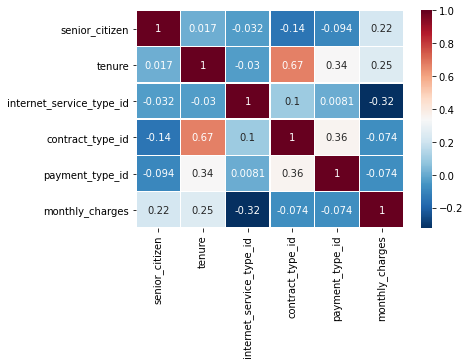

In [16]:
sns.heatmap(pearsoncorr, 
            xticklabels = pearsoncorr.columns,
            yticklabels = pearsoncorr.columns,
            cmap = 'RdBu_r',
            annot = True,
            linewidth = 0.5)

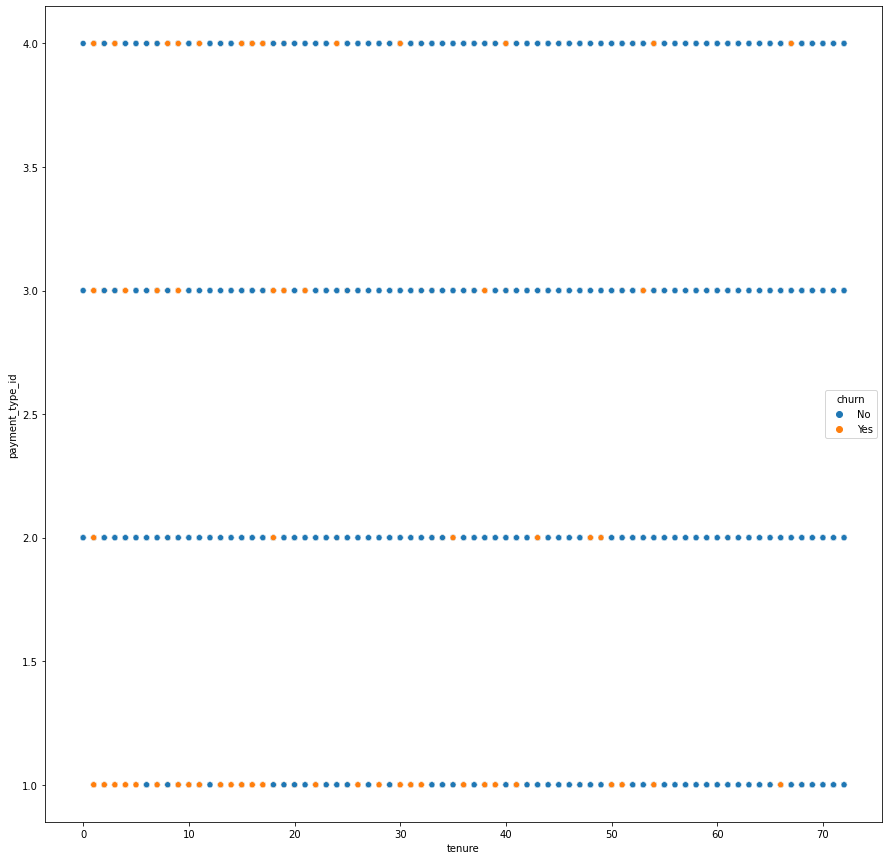

In [20]:
fig, first = plt.subplots(figsize=(15, 15))
first = sns.scatterplot(data = customers, x = "tenure", y = "payment_type_id", hue = "churn")

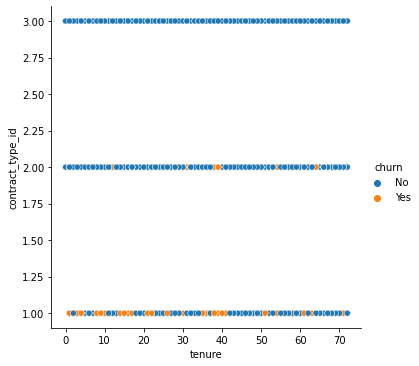

In [24]:
sns.relplot(data = customers, x = "tenure", y = "contract_type_id", hue = "churn")

<AxesSubplot:xlabel='payment_type_id', ylabel='contract_type_id'>

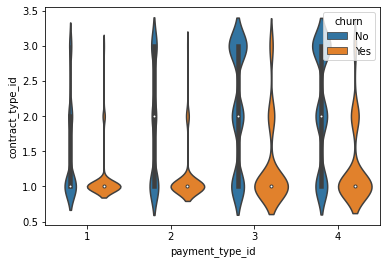

In [19]:
sns.violinplot(data = customers, x = "payment_type_id", y = "contract_type_id", hue = "churn")

<AxesSubplot:xlabel='streaming_movies', ylabel='senior_citizen'>

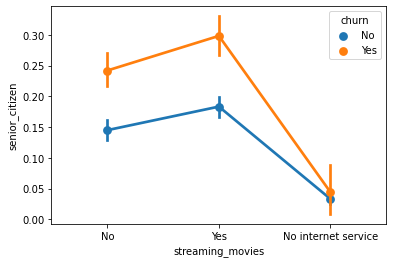

In [30]:
sns.pointplot(data = customers, x = "streaming_movies", y = "senior_citizen", hue = "churn")

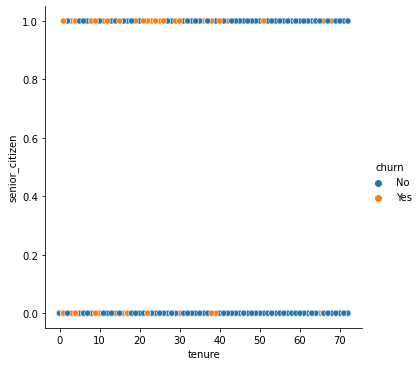

In [31]:
sns.relplot(data = customers, x = "tenure", y = "senior_citizen", hue = "churn")

<AxesSubplot:xlabel='payment_type_id', ylabel='churn'>

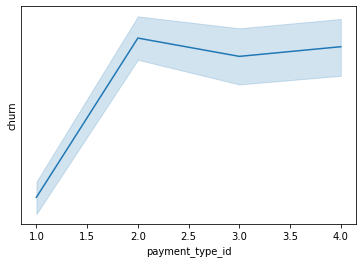

In [33]:
sns.lineplot(data = monthly_customers, x = "payment_type_id", y = "churn")

In [ ]:
yearly_customers = customers[customers["contract_type_id"] == 2]
yearly_customers

In [ ]:
two_year_customers = customers[customers["contract_type_id"] == 3]
two_year_customers

In [ ]:
sns.pairplot(data = monthly_customers)